In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
df = pd.read_csv("data_set_v2.csv", parse_dates=True, infer_datetime_format= True)

In [3]:
print (df.shape)
df.head().T

(60911, 54)


,0,1,2,3,4
user_id,1.75825e+09,1.05826e+10,1.64298e+10,1.78801e+10,2.29456e+10
metric_ts,2016-10-31 23:00:00,2016-10-31 21:00:00,2016-10-31 13:00:00,2016-10-31 23:00:00,2016-10-29 13:00:00
game_id,10116,10116,10116,10116,10116
geo_country,4697,3837,277,4697,3837
geo_city,6848,56894,288695,9344,499358
install_ts,2014-10-09 08:55:40,2015-09-29 12:09:20,2016-03-18 07:17:56,2016-05-03 02:36:54,2016-08-12 03:32:53
platform,2,2,1,2,2
device_id,2694,562,1420,1368,1420
lag1_metric_ts,2016-10-31 18:00:00,2016-10-31 19:00:00,2016-10-31 07:00:00,2016-10-31 22:00:00,2016-10-27 15:00:00
lag0_vip_level,21,22,21,23,14


In [4]:
df['metric_ts']= pd.to_datetime(df['metric_ts'])
df['install_ts']= pd.to_datetime(df['install_ts'])
df['lag1_metric_ts']= pd.to_datetime(df['lag1_metric_ts'])

In [5]:
#df.dtypes

In [6]:
# Use only the relevant metrics from timestamp and drop the redundant ones
df['metric_ts_day']=df['metric_ts'].dt.day
df['metric_ts_hour']=df['metric_ts'].dt.hour

df['install_ts_year']=df['install_ts'].dt.year
df['install_ts_month']=df['install_ts'].dt.month
df['install_ts_day']=df['install_ts'].dt.day
df['install_ts_hour']=df['install_ts'].dt.hour
df['install_ts_min']=df['install_ts'].dt.minute

df['lag1_metric_ts_day']=df['lag1_metric_ts'].dt.day
df['lag1_metric_ts_hour']=df['lag1_metric_ts'].dt.hour



In [7]:
# drop the fields which are not adding any information gain
df=df.drop(['user_id','metric_ts','install_ts','lag1_metric_ts','game_id'],axis=1)

In [8]:
#df.head().T
df.shape

(60911, 58)

In [9]:
#df.isnull().any()
df.isnull().values.sum()

329

In [10]:
# Since the null values are in very small percentage, better to drop
df=df.dropna()
df.shape

(60582, 58)

In [11]:
#df.describe().T

In [12]:
# convert the categorical fields
df= pd.get_dummies(data=df, columns=['platform','geo_country','geo_city','device_id','lag0_alliance_id',
                                'lag1_alliance_id','lag0_subs_active','lag1_subs_active'])

In [13]:
df.head().T

,0,1,2,3,4
lag0_vip_level,2.100000e+01,2.200000e+01,2.100000e+01,2.300000e+01,1.400000e+01
lag1_vip_level,2.100000e+01,2.200000e+01,2.100000e+01,2.300000e+01,1.400000e+01
lag0_user_level,2.800000e+01,2.800000e+01,2.200000e+01,3.100000e+01,2.200000e+01
lag1_user_level,2.800000e+01,2.800000e+01,2.000000e+01,3.100000e+01,2.200000e+01
lag0_lifetime_revenue,1.130784e+02,4.477106e+01,2.550398e+01,8.234185e+01,2.454938e+01
lag1_lifetime_revenue,1.179214e+02,4.961410e+01,3.034703e+01,8.718489e+01,2.939242e+01
lag0_research_power,9.625182e+02,1.188486e+03,2.250085e+02,3.589034e+03,2.934497e+01
lag1_research_power,9.625182e+02,1.188486e+03,2.250085e+02,3.589034e+03,2.929319e+01
lag0_trap_power,1.595593e+03,1.256411e+04,1.974362e+01,0.000000e+00,1.123436e+01
lag1_trap_power,1.595593e+03,1.256411e+04,1.974362e+01,0.000000e+00,1.123436e+01


In [14]:
df.shape

(60582, 60981)

(array([ 59777.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    805.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

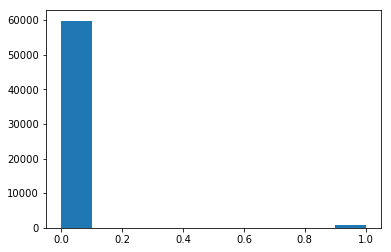

In [15]:
plt.hist(df['churn_indicator'])

In [16]:
df['churn_indicator'].value_counts()

0    59777
1      805
Name: churn_indicator, dtype: int64

In [17]:
805*100/(805+59777)

1.3287775246772968

### CHECK POINT..

In [18]:
mz_df= df

In [19]:
#from sklearn import preprocessing
#scaler=preprocessing.StandardScaler().fit(mz_df)
#mz_df= scaler.transform(mz_df)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN 

In [21]:
target= mz_df['churn_indicator']
features= mz_df.drop(['churn_indicator'],axis=1)

In [22]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=10)

In [23]:
print (train_X.shape)
print (train_y.shape)

(48465, 60980)
(48465,)


In [ ]:
# Tried both Oversampling and Downsampling
rus = RandomOverSampler(random_state=42)
X_res, y_res = rus.fit_sample(train_X, train_y)
print (X_res.shape)
print (y_res.shape)

In [121]:
# Combination of Downsampling and Upsampling...It was time consuming operation. Had to stop it
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_sample(train_X, train_y)
print (X_ada.shape)
print (y_ada.shape)

KeyboardInterrupt: 

In [115]:
# Downsampling with LR

clf_lr= LogisticRegression(random_state=10)
#clf_lr.fit(train_X, train_y)
clf_lr.fit(X_res,y_res)
LR_pred= clf_lr.predict(test_X)
LR_f1score= f1_score(test_y, LR_pred, average='micro')
print (LR_f1score)

0.868366757448


In [116]:
# Downsampling with RF 
clf_rf= RandomForestClassifier(random_state=10)
#clf_rf.fit(train_X, train_y)
clf_rf.fit(X_res,y_res)
RF_pred= clf_rf.predict(test_X)
RF_f1score= f1_score(test_y, RF_pred, average='micro')
print (RF_f1score)

0.985062309152


In [ ]:
# ADASYN with LR

clf_lr= LogisticRegression(random_state=10)
#clf_lr.fit(train_X, train_y)
clf_lr.fit(X_ada,y_ada)
LR_pred= clf_lr.predict(test_X)
LR_f1score= f1_score(test_y, LR_pred, average='micro')
print (LR_f1score)

In [ ]:
# ADASYN with RF 
clf_rf= RandomForestClassifier(random_state=10)
#clf_rf.fit(train_X, train_y)
clf_rf.fit(X_ada,y_ada)
RF_pred= clf_rf.predict(test_X)
RF_f1score= f1_score(test_y, RF_pred, average='micro')
print (RF_f1score)

In [24]:
# Without Sampling

clf_lr= LogisticRegression(random_state=10)
clf_lr.fit(train_X, train_y)
LR_pred= clf_lr.predict(test_X)
LR_pred_prob= clf_lr.predict_proba(test_X)
LR_f1score= f1_score(test_y, LR_pred, average='micro')
print (LR_f1score)
print ("Churn probability of each user:", LR_pred_prob)

0.98522736651
Churn probability of each user: [[  5.51704376e-01   4.48295624e-01]
 [  5.08161536e-01   4.91838464e-01]
 [  5.27763972e-01   4.72236028e-01]
 ..., 
 [  5.33157896e-01   4.66842104e-01]
 [  1.00000000e+00   1.13196896e-25]
 [  1.00000000e+00   2.13091201e-54]]


/Users/rajegupt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [25]:
# Without Sampling
clf_rf= RandomForestClassifier(random_state=10)
clf_rf.fit(train_X, train_y)
RF_pred= clf_rf.predict(test_X)
RF_pred_prob= clf_rf.predict_proba(test_X)
RF_f1score= f1_score(test_y, RF_pred, average='micro')
print (RF_f1score)
print ("Churn probability of each user:", RF_pred_prob)

0.985474952546
Churn probability of each user: [[ 1.   0. ]
 [ 0.9  0.1]
 [ 1.   0. ]
 ..., 
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]]


In [96]:
#print (precision_score(test_y, LR_pred, average='micro'))
#print (recall_score(test_y, LR_pred, average='micro'))

### Conclusion: Both Logistic Regression and Random Forest provided both good precision and recall (>0.98) without actually using random Oversampling and random Downsampling techniques. Results could be improved by combining  Oversampling and Downsampling techniques at the same time.

In [ ]:
# Tried to play with Dimensionality reduction technique. But for some reason kernel was dying everytime. 
# So I have just written the code for your reference. May provide atleast better result with Logistic Regression 
# since the input dimension are large ((48465, 60980)) 

from sklearn.decomposition import PCA
pca = PCA(n_components=4, random_state=10)
pca.fit(features)
print (pca.explained_variance_ratio_)
features_PCA= pca.transform(features)